In [1]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [28]:
df = pd.read_csv('Elon_musk.csv',encoding=('latin1'))

In [29]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [30]:

#clean the text data
#user defines function to clear text data
def cleanTxt(tweets):
  tweets = re.sub(r'@[A-Za-z0-9]+', '', tweets) #to remove @mentions
  tweets = re.sub(r'#', '', tweets) #to remove hashtag symbol
  tweets = re.sub(r'RT[\s]+', '', tweets) #to remove retweets
  tweets = re.sub(r'https?:\/\/\S+', '', tweets)#to remove the hyperlinks
  tweets = "".join([x for x in tweets if x not in string.punctuation]) #to remove punc
  tweets = re.sub(' +', ' ', tweets) #to remove extra white spaces
  tweets = tweets.lower() #to change to lower
  tokens = tweets.split(" ")
  tokens = [token for token in tokens if token not in my_stopwords] #taking only words which are not in stopwords
  tweets = " ".join([ps.stem(token) for token in tokens])
  return tweets

#cleaning the text
df['Text'] = df['Text'].apply(cleanTxt)

In [31]:
df['Text']

0                                               im alien
1         aacarmack ray trace cyberpunk hdr nextlevel tri
2                                         great interview
3                                         doge underestim
4        congratul tesla china amaz execut last year n...
                              ...                        
1994     true sound surreal neg propaganda still amp e...
1995       make sure read ur term amp condit click accept
1996                                         samwis gamge
1997                 altho dumb dumber u0001f525u0001f525
1998                             progress updat august 28
Name: Text, Length: 1999, dtype: object

In [32]:
#create a function to get the subjectivity 
def getSubjectivity(tweets):
  return TextBlob(tweets).sentiment.subjectivity

#create a function to get polarity
def getPolarity(tweets):
  return TextBlob(tweets).sentiment.polarity

#creating columns for above two
df['Subjectivity'] = df['Text'].apply(getSubjectivity)
df['Polarity'] = df['Text'].apply(getPolarity)

In [33]:
df # to see all the subjectivity and polarity

,Unnamed: 0,Text,Subjectivity,Polarity
0,1,im alien,0.750000,-0.250000
1,2,aacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,0.000000
2,3,great interview,0.750000,0.800000
3,4,doge underestim,0.000000,0.000000
4,5,congratul tesla china amaz execut last year n...,0.033333,0.000000
...,...,...,...,...
1994,1995,true sound surreal neg propaganda still amp e...,0.443333,0.186667
1995,1996,make sure read ur term amp condit click accept,0.888889,0.500000
1996,1997,samwis gamge,0.000000,0.000000
1997,1998,altho dumb dumber u0001f525u0001f525,0.500000,-0.375000


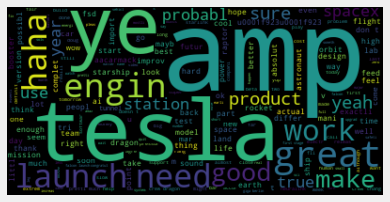

In [34]:
#plot the wordcloud
allwords = ' '.join([i for i in df['Text']])
wordcloud = WordCloud().generate(allwords)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [35]:
#Create a funtion to compute the negative ,neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [36]:
df

,Unnamed: 0,Text,Subjectivity,Polarity,Analysis
0,1,im alien,0.750000,-0.250000,Negative
1,2,aacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,0.000000,Neutral
2,3,great interview,0.750000,0.800000,Positive
3,4,doge underestim,0.000000,0.000000,Neutral
4,5,congratul tesla china amaz execut last year n...,0.033333,0.000000,Neutral
...,...,...,...,...,...
1994,1995,true sound surreal neg propaganda still amp e...,0.443333,0.186667,Positive
1995,1996,make sure read ur term amp condit click accept,0.888889,0.500000,Positive
1996,1997,samwis gamge,0.000000,0.000000,Neutral
1997,1998,altho dumb dumber u0001f525u0001f525,0.500000,-0.375000,Negative


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()

In [38]:
X = df['Text']

In [39]:
X = tf_idf.fit_transform(X)

In [47]:
X


<1999x3418 sparse matrix of type '<class 'numpy.float64'>'
	with 10913 stored elements in Compressed Sparse Row format>